# DSP Signal Processing and Cloud Integration
Generating a noisy sine wave and applying a low-pass filter.
- **Tools:** Python, NumPy, SciPy, Matplotlib
- **Features:** Signal generation, filtering, visualization

In [14]:
# Cell 1: Imports and Setup
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import boto3
%matplotlib inline



In [15]:
# Cell 2: Generate Signal with Noise
t = np.linspace(0, 1, 1000)
freq = 5  # 5 Hz sine wave
noise = 0.5 * np.random.normal(0, 1, t.size)  # Add noise
signal_clean = np.sin(2 * np.pi * freq * t)
signal_noisy = signal_clean + noise



In [16]:
# Cell 3: Apply Low-Pass Filter
fs = 1000  # Sampling frequency (samples per second)
cutoff = 10  # Cutoff frequency (Hz)
order = 4  # Filter order
b, a = signal.butter(order, cutoff / (fs / 2), btype='low')  # Design filter
signal_filtered = signal.filtfilt(b, a, signal_noisy)  # Apply filter



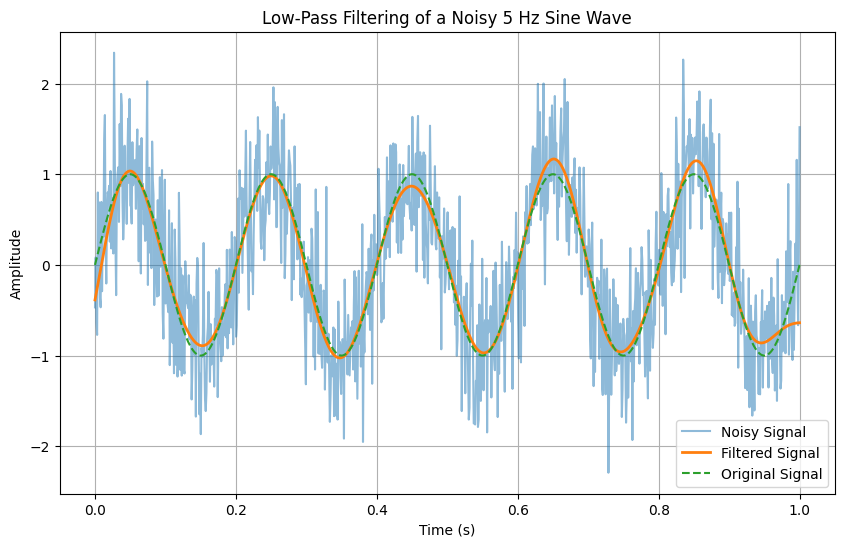

In [17]:
# Cell 4: Plot Results
plt.figure(figsize=(10, 6))
plt.plot(t, signal_noisy, label="Noisy Signal", alpha=0.5)
plt.plot(t, signal_filtered, label="Filtered Signal", linewidth=2)
plt.plot(t, signal_clean, label="Original Signal", linestyle="--")
plt.title("Low-Pass Filtering of a Noisy 5 Hz Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.savefig("filtered_signal.png")
plt.show()

